<a href="https://colab.research.google.com/github/afnanmb/AndroidTutorialForBeginners/blob/master/datascience_project_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Diamond)
## by (Afnan Mohamed Bakr Mabrouk)

> Dataset about diamond which show the different :

> 1- colors (G , E , J , F , H , D , I) .

> 2-clarity (IF , VVS1 , VVS2 , VS1 , VS2 , SI1 , SI2 , I1)  .

> 3- cut (shape of diamond).

> 4- carat (unit of mass) .

> 5- depth (the depth of shape of diamond) .

> 6- prices. 

> 7- dimensions of diamond in x ,y and z .



```
# import libraries
```



In [42]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import io 

Saving DiamondData.csv to DiamondData.csv


```
#import your dataset 
```

In [3]:
x = pd.read_csv(io.BytesIO(uploaded['DiamondData.csv']))
x.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.50,Fair,G,SI1,64.5,57.0,10352.0,7.15,7.09,4.59
1,0.70,Ideal,E,VS2,61.4,57.0,2274.0,5.72,5.78,3.53
2,1.22,Premium,G,VS1,61.3,58.0,8779.0,6.91,6.89,4.23
3,0.51,Premium,E,VS2,62.5,60.0,1590.0,5.08,5.10,3.18
4,2.02,Very Good,J,SI2,59.2,60.0,11757.0,8.27,8.39,4.91


**Find the mean, median, standard deviation**

In [ ]:
print('Mean =' , x['price'].mean())

Mean = 3938.8034856373247


In [ ]:
print('Median =' , x['price'].median())

Median = 2401.0


In [ ]:
print('standard deviation =' , x['price'].std())

standard deviation = 3994.6432347341415


**Create a normalized form whose values range exactly between 0 and 1 so that the minimum has value 0 and maximum has value 1.**

In [ ]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))
print("Normalization for the head of price column :\n" , NormalizeData(x['price'].head()))

Normalization for the head of price column :
 0    0.861808
1    0.067276
2    0.707092
3    0.000000
4    1.000000
Name: price, dtype: float64


**Compute the softmax score**

In [ ]:
n= 20
def softmax(s):
  return np.exp(s) / np.sum(np.exp(s), axis=0)
print("Softmax for frist 20 rows :\n" , softmax(x['price'].head(n = n)))

Softmax for frist 20 rows :
 0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    0.0
16    NaN
17    NaN
18    NaN
19    NaN
Name: price, dtype: float64


/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


**Find the number and position of missing values**

In [ ]:
print("sum of null values for each column :\n" , x.isnull().sum())
print("Position of null values in depth column : \n" , x.loc[x['depth'].isnull()] )                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

sum of null values for each column :
 carat        0
cut          0
color        0
clarity      0
depth      471
table      390
price      253
x          221
y          333
z          428
dtype: int64
Position of null values in depth column : 
        carat        cut color clarity  depth  table    price     x     y     z
80      1.54      Ideal     G    VVS1    NaN   57.0  16169.0  7.45  7.49  4.54
132     1.09       Good     G     SI2    NaN   61.0   3424.0  6.82  6.75  3.89
176     0.35  Very Geod     E     SI1    NaN   57.0    614.0  4.47  4.52  2.82
346     0.81    Premium     G     VS1    NaN   56.0   3266.0  5.95  5.89  3.69
395     0.31      Ideal     F    VVS1    NaN   56.0    884.0  4.33  4.37  2.69
...      ...        ...   ...     ...    ...    ...      ...   ...   ...   ...
48779   0.33      Ideal     G      IF    NaN   55.0    946.0  4.44  4.45  2.75
48915   1.09      Ideal     D     SI2    NaN   56.0   5164.0  6.56  6.59  4.08
49145   0.31    Premium     E     SI1    NaN

**Select the rows that does not have any value**

In [ ]:
n = 10
x[pd.isnull(x).any(axis=1)].head(n = n)

,carat,cut,color,clarity,depth,table,price,x,y,z
63,1.11,Ideal,E,SI2,62.8,55.0,NaN,6.62,6.60,4.15
80,1.54,Ideal,G,VVS1,NaN,57.0,16169.0,7.45,7.49,4.54
97,0.41,Premium,F,SI2,59.0,NaN,775.0,4.89,4.87,2.88
99,1.65,Ideal,J,SI1,62.5,56.0,NaN,7.59,7.54,4.73
106,0.56,Premium,G,SI1,62.4,58.0,1304.0,5.23,5.29,NaN
110,0.30,Ideal,D,VS1,60.8,58.0,742.0,4.31,NaN,2.63
119,0.70,Very Good,E,SI1,62.3,58.0,2476.0,5.60,5.67,NaN
132,1.09,Good,G,SI2,NaN,61.0,3424.0,6.82,6.75,3.89
142,1.02,Good,F,SI1,63.5,57.0,4594.0,6.35,NaN,4.05
176,0.35,Very Geod,E,SI1,NaN,57.0,614.0,4.47,4.52,2.82


**Find the unique values and the count of unique values**

In [ ]:
print("Unique Val. : " , x['color'].unique() , "\ncount of uniqe val. : " , len(set(x['color'])))

Unique Val. :  ['G' 'E' 'J' 'F' 'H' 'D' 'I'] 
count of uniqe val. :  7


**Find the most frequent value of dataset**

In [ ]:
print("Frequent value for each column :\n" ,x.mode())

Frequent value for each column :
    carat    cut color clarity  depth  table  price     x     y    z
0    0.3  Ideal     G     SI1   62.0   56.0  605.0  4.37  4.34  2.7


> Write the structure  of your dataset here 




----

# Type of data analysis
## Univariate
> is a term commonly used in statistics to describe a type of data which consists of observations on only a single characteristic or attribute.

>Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable.

## Bivariate
>In statistics, bivariate data is data on each of two variables, where each value of one of the variables is paired with a value of the other variable. Typically it would be of interest to investigate the possible association between the two variables.

>Bivariate analysis is one of the simplest forms of quantitative (statistical) analysis. It involves the analysis of two variables (often denoted as X, Y), for the purpose of determining the empirical relationship between them.

## Multivariate
>Multivariate statistics is a subdivision of statistics encompassing the simultaneous observation and analysis of more than one outcome variable. The application of multivariate statistics is multivariate analysis.

>Multivariate analysis is based on the principles of multivariate statistics, which involves observation and analysis of more than one statistical outcome variable at a time.

![picture](https://drive.google.com/uc?export=view&id=1ors5QRIf6ISa-aidarRJ6A0-ueY31hk9)

------

# Univariate
> Make at least one chart
,write your observation under every chart

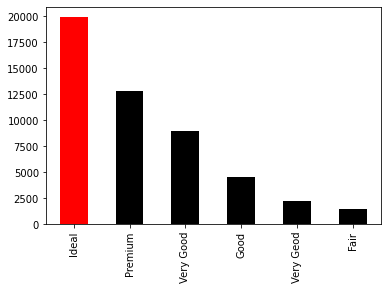

In [ ]:
x['cut'].value_counts().head(10).plot.bar(color=['red' , 'black' , 'black' , 'black' , 'black' , 'black' ])

# Here the most frequent cut is ideal 




------

# Bivariate
> Make at least one chart
,write your observation under every chart

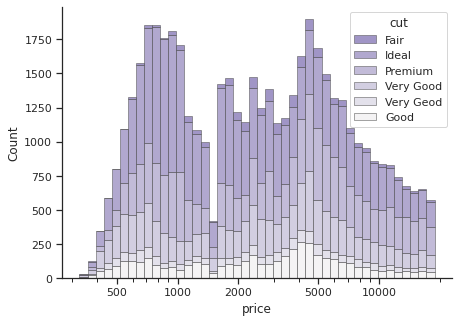

In [43]:
sns.set_theme(style="ticks")
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    x,
    x="price", hue="cut",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

# Stacked bar show count of each cut for each price the most frequent cut is **ideal**

----


# Multivariate
> Make at least one chart
,write your observation under every chart

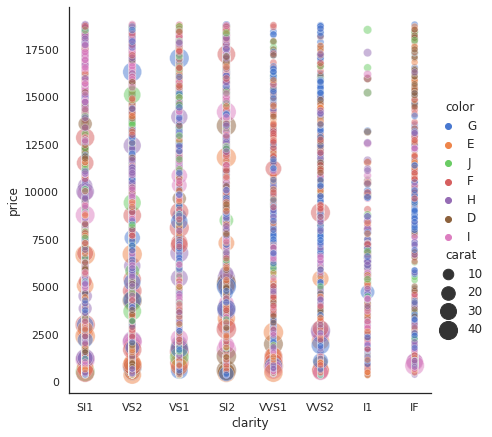

In [39]:
sns.set_theme(style="white")
sns.relplot(x="clarity", y="price", hue="color", size="carat",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=x)

**Scatterplot with varying point sizes and hues**
# Here the relation between price and clarity depending on the carat(weigth of diamond ) with different colors

----

# SUMMERY
 



>here write your summery about dataset

>List at least three insights.

1. 
1. 
1. 




# Useful references

* [Python Guide](https://docs.python.org/3/tutorial/index.html)  
[Python Guide](https://www.w3schools.com/python/)
* [Data Cleaning Guide](https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d)
* [Pandas Guide](https://pandas.pydata.org/docs/user_guide/index.html)
* [Matplotlib Examples](https://matplotlib.org/gallery/index.html)

* [Seaborn Examples](https://seaborn.pydata.org/examples/index.html)

